## Generating Accessibility Vars

Arezoo Besharati, Paul Waddell, UrbanSim, July 2018 


In [1]:
import os; os.chdir('../')
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import seaborn as sns
from scipy.stats import norm
import orca

import warnings;
warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2

### Load data

In [2]:
# Load any script-based Orca registrations
from scripts import datasources
from scripts import models

### Generate Node variables

In [3]:
%%capture
orca.run(["initialize_network_drive", 
          "network_aggregations_drive",
          "initialize_network_small", 
          "network_aggregations_small",
          "initialize_network_walk", 
          "network_aggregations_walk"])

In [4]:
# get a list of all existing tables
orca.list_tables()

['parcels',
 'buildings',
 'craigslist',
 'rentals',
 'units',
 'households',
 'persons',
 'jobs',
 'nodesdrive',
 'nodessmall',
 'nodeswalk']

## Inspect the data

In [8]:
nodesdrive = orca.get_table('nodesdrive').to_frame()
nodessmall = orca.get_table('nodessmall').to_frame()
nodeswalk = orca.get_table('nodeswalk').to_frame()
nodesdrive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228066 entries, 25457926 to 5742788424
Data columns (total 9 columns):
residential_units_500     228066 non-null float32
residential_units_1500    228066 non-null float32
population_1500           228066 non-null float32
poor_1500                 228066 non-null float32
renters_1500              228066 non-null float32
med_income_1500           228066 non-null float32
job_1500                  228066 non-null float32
ave_hhsize                228066 non-null float32
med_rent_1500             228066 non-null float32
dtypes: float32(9)
memory usage: 9.6 MB


In [9]:
nodesdrive.to_csv('data/nodesdrive_vars.csv')
nodessmall.to_csv('data/nodessmall_vars.csv')
nodeswalk.to_csv('data/nodeswalk_vars.csv')


### Explore Median_income_1500

In [10]:
minus_one = len(nodesdrive[nodesdrive.med_income_1500 == -1])
print('{} nodes have median rent zero or below'.format(minus_one))
total_nodes = len (nodesdrive)
print('Total nodes count {}'.format(total_nodes))
print('{0:.2f} percent of nodes have no data for med_income'.format(minus_one/total_nodes*100))

21977 nodes have median rent zero or below
Total nodes count 228066
9.64 percent of nodes have no data for med_income


<IPython.core.display.Javascript object>


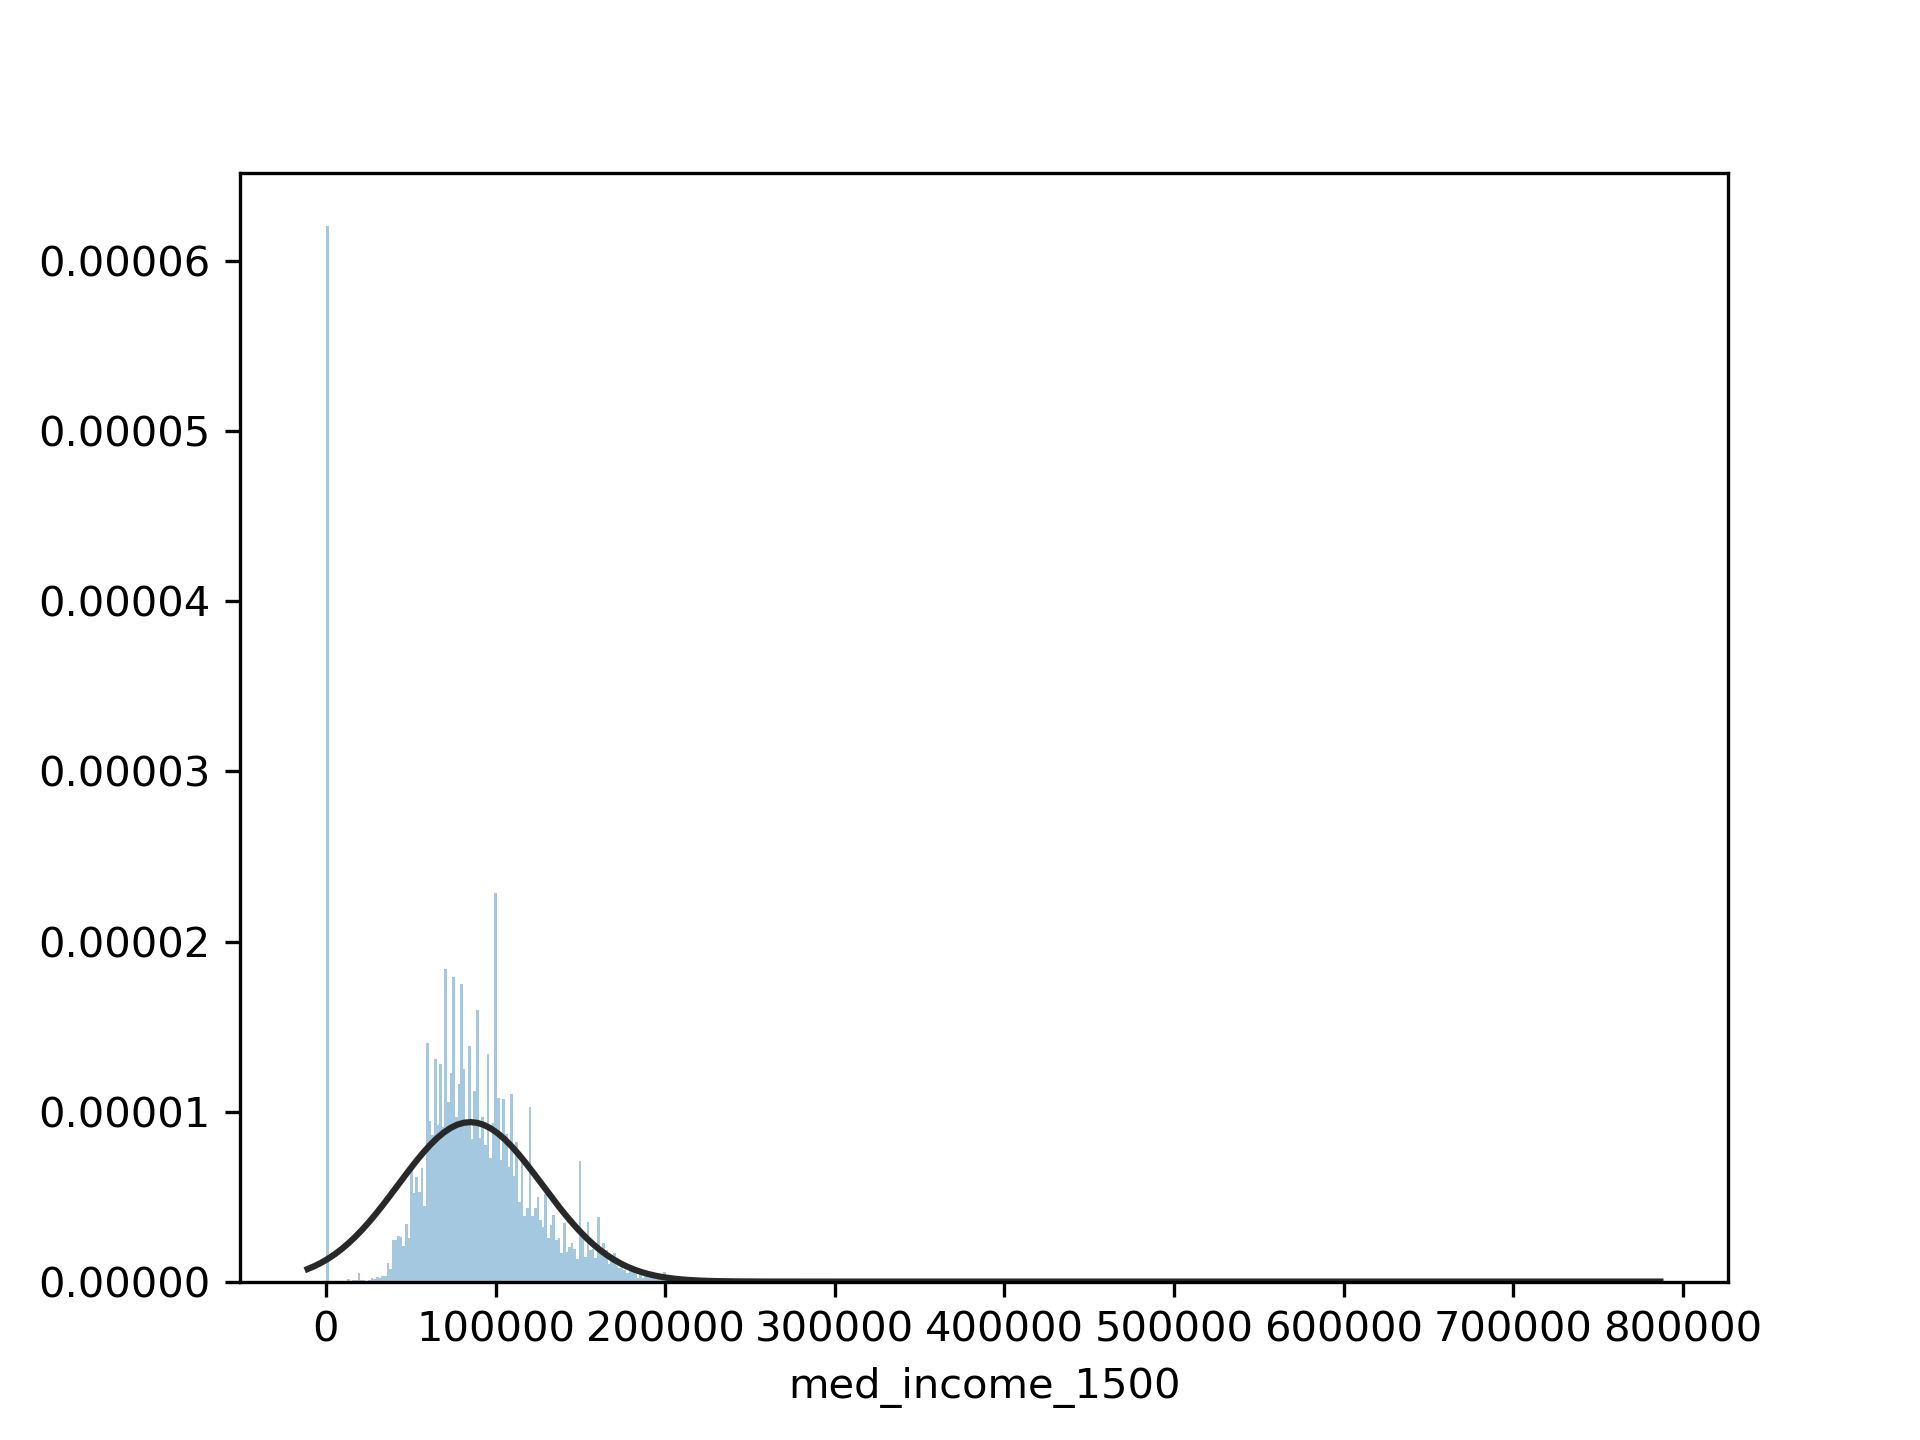

In [11]:
%matplotlib notebook

ax = sns.distplot(nodesdrive.med_income_1500, bins=500,  fit=norm, kde=False)

<IPython.core.display.Javascript object>


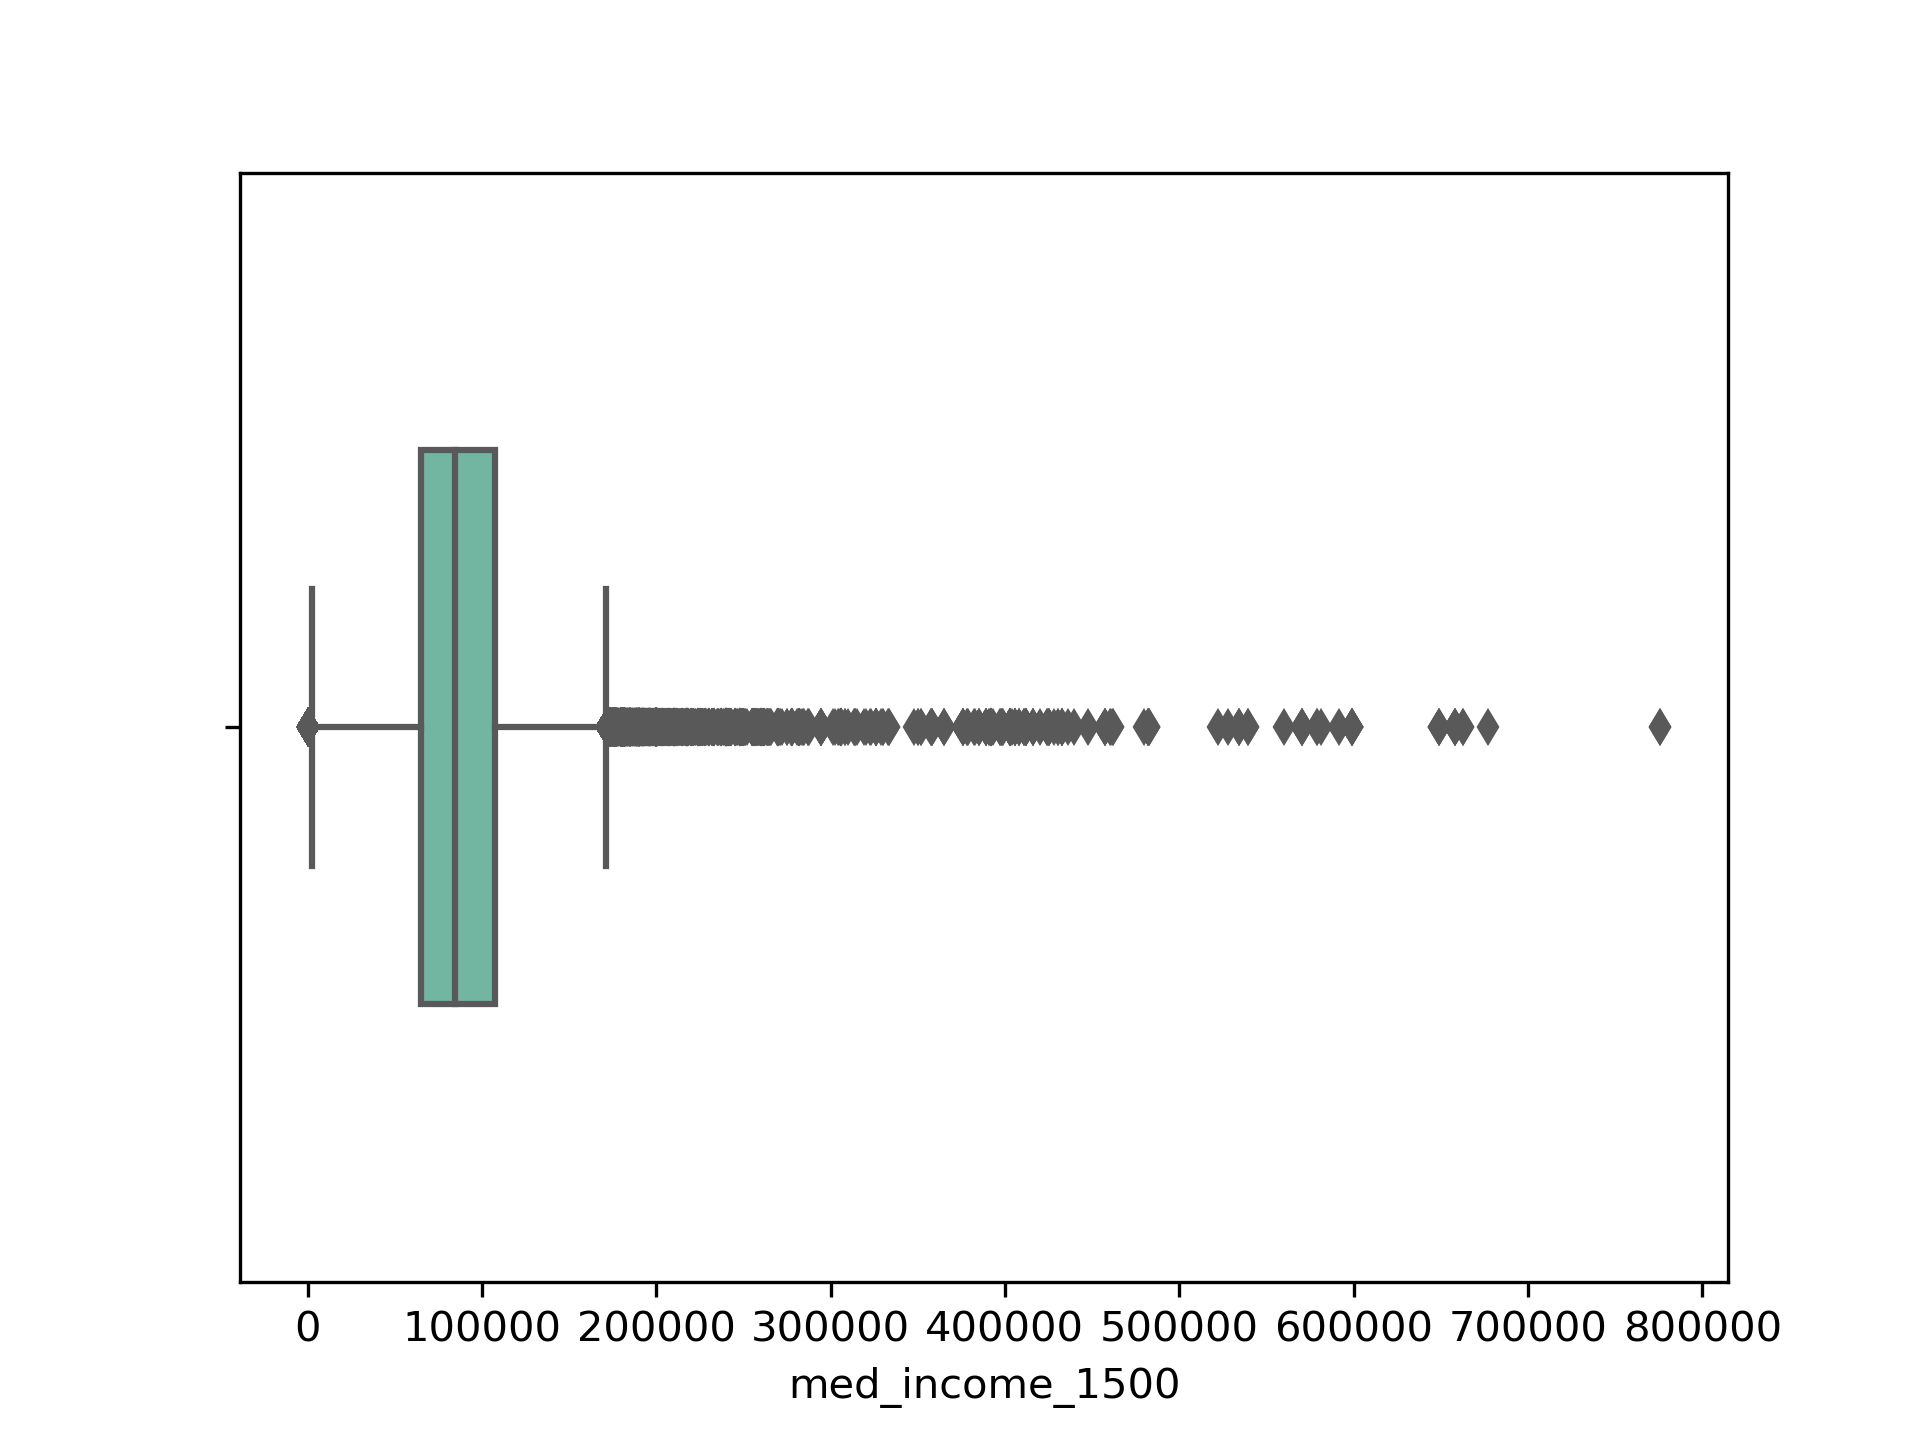

In [12]:
#Find the outliers
%matplotlib notebook
ax = sns.boxplot(x = nodesdrive.med_income_1500, palette="Set2", width=0.5)


In [13]:
#Get relevant percentiles and see their distribution
nodesdrive.med_income_1500.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1])


0.00        -1.0
0.10     33600.0
0.20     60000.0
0.30     69400.0
0.40     76690.0
0.50     84800.0
0.60     94000.0
0.70    102000.0
0.80    114000.0
0.90    136000.0
0.95    155000.0
1.00    776000.0
Name: med_income_1500, dtype: float64

In [14]:
len(nodesdrive[nodesdrive.med_income_1500>200000])

1038

### Explore Med_rent_sqft_1500

In [15]:
minus_one = len(nodesdrive[nodesdrive.med_rent_sqft_1500 < 0])
print('{} nodes have median rent zero or below'.format(minus_one))
total_nodes = len (nodesdrive)
print('Total nodes count {}'.format(total_nodes))
print('{0:.2f} percent of nodes have no data for med_rent'.format(minus_one/total_nodes*100))



AttributeError: 'DataFrame' object has no attribute 'med_rent_sqft_1500'

In [ ]:
%matplotlib notebook
filtered = nodesdrive.med_rent_sqft_1500[nodesdrive.med_rent_sqft_1500 <10]
ax = sns.distplot(filtered, bins=50, kde=False)

In [ ]:
# %matplotlib notebook
# plt.hist(np.log1p(nodes.population_1500))

In [ ]:
# %matplotlib notebook
# plt.hist(np.power(nodes.population_1500,1/3))